# Exploring pangolin's mutation annotated tree

In [1]:
import os
import matplotlib
from collections import defaultdict
from matplotlib import pyplot as plt
from Bio.Phylo.NewickIO import Parser
from pyrocov.align import PANGOLEARN_DATA
from pyrocov.external.usher import parsimony_pb2
from pyrocov.usher import Mutation, NUCLEOTIDE, refine_mutation_tree

# matplotlib.rcParams["figure.dpi"] = 200
matplotlib.rcParams["figure.facecolor"] = "white"

In [2]:
filename = os.path.join(PANGOLEARN_DATA, "lineageTree.pb")
# filename = "results/usher/all.masked.pb"
with open(filename, "rb") as f:
    proto = parsimony_pb2.data.FromString(f.read())

In [3]:
print(len(proto.metadata))

89074


In [4]:
lineages = sorted(set(m.clade for m in proto.metadata if m.clade))
"B.1.1.529" in lineages

False

In [5]:
tree = next(Parser.from_string(proto.newick).parse())

In [6]:
clade = next(tree.find_clades())

In [7]:
print(dir(clade))
print(clade.name)

['__bool__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_color', '_filter_search', '_get_color', '_set_color', 'branch_length', 'clades', 'collapse', 'collapse_all', 'color', 'comment', 'common_ancestor', 'confidence', 'count_terminals', 'depths', 'distance', 'find_any', 'find_clades', 'find_elements', 'get_nonterminals', 'get_path', 'get_terminals', 'is_bifurcating', 'is_monophyletic', 'is_parent_of', 'is_preterminal', 'is_terminal', 'ladderize', 'name', 'prune', 'root', 'split', 'total_branch_length', 'trace', 'width']
None


In [8]:
for clade in tree.find_clades():
    if clade.name:
        print(clade.name)
        break

l34086


In [9]:
def plot_mutation_histogram(proto):
    tree = next(Parser.from_string(proto.newick).parse())
    clades = list(tree.find_clades())
    assert len(proto.metadata) == len(clades)
    assert len(proto.node_mutations) == len(clades)
    clade_to_muts = defaultdict(dict)
    for clade, muts in zip(clades, proto.node_mutations):
        for mut in muts.mutation:
            clade_to_muts[clade][mut.position] = Mutation(
                mut.position,
                NUCLEOTIDE[mut.ref_nuc],
                "".join(NUCLEOTIDE[n] for n in mut.mut_nuc),
            )
        for c in clade.clades:
            clade_to_muts[c].update(clade_to_muts[clade])
    plt.hist([len(m.mutation) for m in proto.node_mutations], bins=range(21))
    plt.yscale("log")

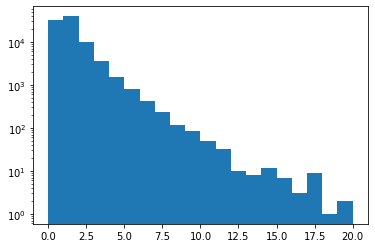

In [10]:
plot_mutation_histogram(proto)

## After pruning

In [11]:
max_num_clades = 10000
with open(f"results/lineageTree.{max_num_clades}.pb", "rb") as f:
    proto = parsimony_pb2.data.FromString(f.read())

In [12]:
sum(1 for m in proto.metadata if m.clade)

10000

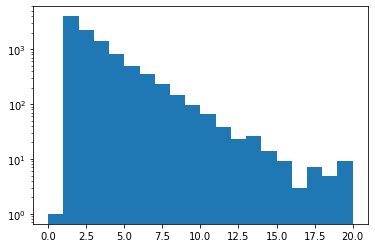

In [13]:
plot_mutation_histogram(proto)